如果更改第一层和第二层的暂退法概率，会发生什么情况？具体地说，如果交换这两个层，会发生什么情况？设计一个实验来回答这些问题，定量描述该结果，并总结定性的结论

## 定义网络

In [25]:
%matplotlib inline
from tqdm import tqdm
import torch
from torch import nn
from d2l import torch as d2l
import numpy as np

def Net(num_inputs=784, num_outputs=10, num_hiddens1=256, num_hiddens2=256, dropout1=0.5, dropout2=0.2):
    net = nn.Sequential(nn.Flatten(),
                    nn.Linear(num_inputs, num_hiddens1),
                    nn.ReLU(),
                    nn.Dropout(dropout1),
                    nn.Linear(num_hiddens1, num_hiddens2),
                    nn.ReLU(),
                    nn.Dropout(dropout2),
                    nn.Linear(num_hiddens2, num_outputs))
    return net

def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, std=0.01)

## 定义绘图器

In [26]:
import matplotlib.pyplot as plt

def plot_training_results(train_losslist, train_acclist, test_acclist,
                         dropout1_list, dropout2_list,
                         figsize=(15, 10), wspace=0.3, hspace=0.4):
    """
    统一绘制所有训练结果
    """
    dropout1_num = len(dropout1_list)
    dropout2_num = len(dropout2_list)
    epochs = train_losslist.shape[2]
    x_axis = np.arange(1, epochs + 1)

    fig, axes = plt.subplots(dropout1_num, dropout2_num, figsize=figsize)
    if dropout1_num == 1 and dropout2_num == 1:
        axes = [axes]
    elif dropout1_num == 1 or dropout2_num == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()

    # 遍历每个子图（对应一组 dropout）
    for i in range(dropout1_num):
        for j in range(dropout2_num):
            idx = i * dropout2_num + j
            ax = axes[idx]

            # 绘制三条线
            ax.plot(x_axis, train_losslist[i, j, :], '-', label='Train Loss', color='blue')
            ax.plot(x_axis, train_acclist[i, j, :], 'm--', label='Train Acc', color='red')
            ax.plot(x_axis, test_acclist[i, j, :], 'g-.', label='Test Acc', color='green')

            # 设置标题和图例
            ax.set_title(f'd1={dropout1_list[i]}, d2={dropout2_list[j]}')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Value')
            ax.legend()
            ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.show()

    return fig

前置函数

In [27]:
def accuracy(y_hat, y):
    """计算预测正确的数量"""
    if y_hat.ndim > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(dim=1)
    cmp = (y_hat == y)
    return cmp.sum().item()

def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module):
        net.eval()

    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())

    return metric[0] / metric[1]

def train_epoch_ch3(net, train_iter, loss, updater):
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()

    metric = d2l.Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            l.sum().backward()
            updater(X.shape[0])
        metric.add(l.sum().item(), accuracy(y_hat, y), y.numel())

    return metric[0] / metric[2], metric[1] / metric[2]

## 训练


Training with dropout1=0.2, dropout2=0.2


Epochs (d1=0.2, d2=0.2): 100%|██████████| 10/10 [01:15<00:00,  7.53s/it]



Training with dropout1=0.2, dropout2=0.5


Epochs (d1=0.2, d2=0.5): 100%|██████████| 10/10 [01:16<00:00,  7.65s/it]



Training with dropout1=0.2, dropout2=0.7


Epochs (d1=0.2, d2=0.7): 100%|██████████| 10/10 [01:14<00:00,  7.49s/it]



Training with dropout1=0.5, dropout2=0.2


Epochs (d1=0.5, d2=0.2): 100%|██████████| 10/10 [01:15<00:00,  7.55s/it]



Training with dropout1=0.5, dropout2=0.5


Epochs (d1=0.5, d2=0.5): 100%|██████████| 10/10 [01:16<00:00,  7.60s/it]



Training with dropout1=0.5, dropout2=0.7


Epochs (d1=0.5, d2=0.7): 100%|██████████| 10/10 [01:15<00:00,  7.51s/it]



Training with dropout1=0.7, dropout2=0.2


Epochs (d1=0.7, d2=0.2): 100%|██████████| 10/10 [01:14<00:00,  7.40s/it]



Training with dropout1=0.7, dropout2=0.5


Epochs (d1=0.7, d2=0.5): 100%|██████████| 10/10 [01:15<00:00,  7.51s/it]



Training with dropout1=0.7, dropout2=0.7


Epochs (d1=0.7, d2=0.7): 100%|██████████| 10/10 [01:14<00:00,  7.43s/it]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33688\3268598082.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m--" (-> color='m'). The keyword argument will take precedence.
  ax.plot(x_axis, train_acclist[i, j, :], 'm--', label='Train Acc', color='red')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33688\3268598082.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-." (-> color='g'). The keyword argument will take precedence.
  ax.plot(x_axis, test_acclist[i, j, :], 'g-.', label='Test Acc', color='green')


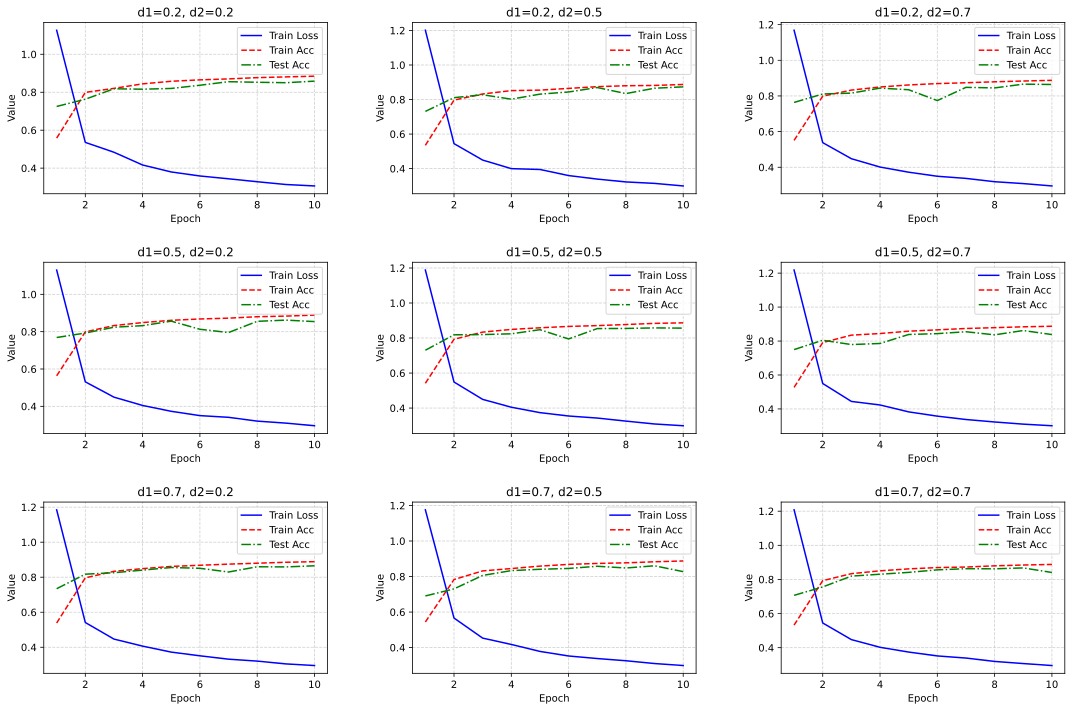

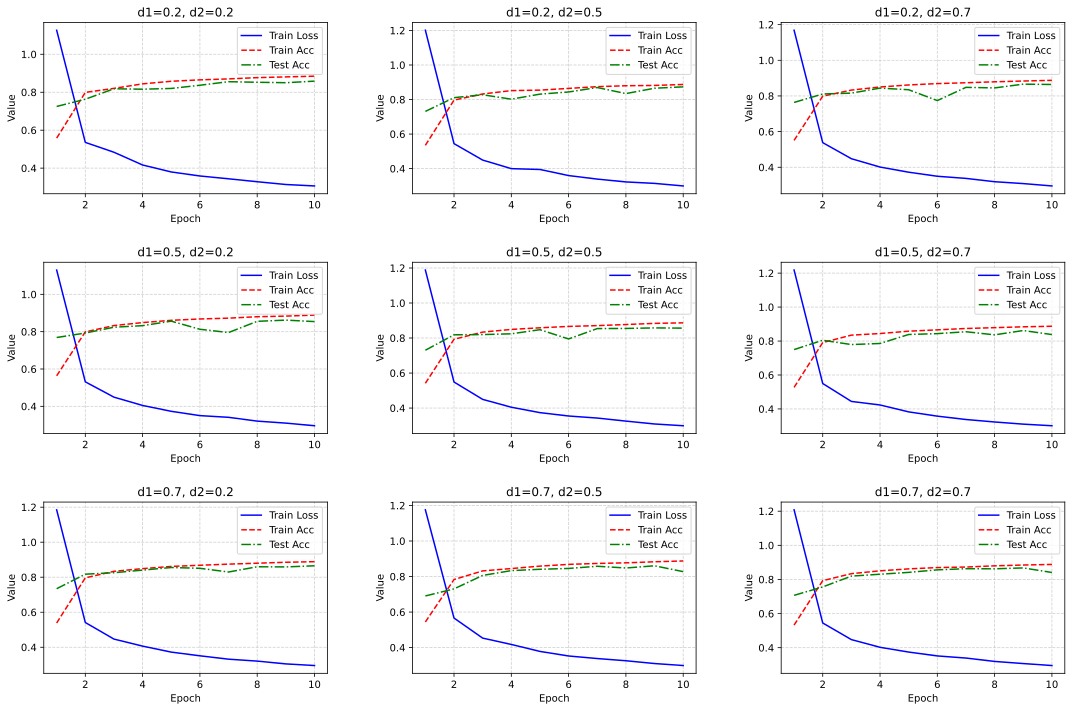

In [30]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 全局设备设置
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def evaluate_accuracy_gpu(net, data_iter, device=None):
    if device is None:
        device = next(iter(net.parameters())).device
        print(device)
    net.eval()
    metric = d2l.Accumulator(2)  # [correct, total]
    with torch.no_grad():
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

def train_with_different_dropouts(dropout1_list, dropout2_list,
                                  train_iter, test_iter,
                                  num_epochs, lr):

    dropout1_num = len(dropout1_list)
    dropout2_num = len(dropout2_list)

    # 初始化结果数组（存储所有训练历史）
    train_losslist = np.zeros((dropout1_num, dropout2_num, num_epochs))
    train_acclist = np.zeros((dropout1_num, dropout2_num, num_epochs))
    test_acclist = np.zeros((dropout1_num, dropout2_num, num_epochs))

    # 外层循环：遍历 dropout 组合
    for i in range(dropout1_num):
        for j in range(dropout2_num):
            print(f"\nTraining with dropout1={dropout1_list[i]}, dropout2={dropout2_list[j]}")

            # 构建模型并移至 GPU
            net = Net(dropout1=dropout1_list[i], dropout2=dropout2_list[j]).to(device)
            net.apply(init_weights)
            loss_fn = nn.CrossEntropyLoss(reduction='none')
            optimizer = torch.optim.SGD(net.parameters(), lr=lr)

            # Epoch 循环 + tqdm 进度条
            for epoch in tqdm(range(num_epochs), desc=f"Epochs (d1={dropout1_list[i]}, d2={dropout2_list[j]})"):
                metric = d2l.Accumulator(3)  # [loss_sum, acc_sum, num_examples]

                # Batch 循环
                for X, y in train_iter:
                    X, y = X.to(device), y.to(device)  # 移到 GPU
                    y_hat = net(X)
                    l = loss_fn(y_hat, y)

                    optimizer.zero_grad()
                    l.mean().backward()
                    optimizer.step()

                    metric.add(float(l.sum()), d2l.accuracy(y_hat, y), y.numel())

                # 计算平均指标
                train_loss = metric[0] / metric[2]
                train_acc = metric[1] / metric[2]

                # 测试集评估
                test_acc = evaluate_accuracy_gpu(net, test_iter, device=device)

                # 存储结果（不再绘图）
                train_losslist[i, j, epoch] = train_loss
                train_acclist[i, j, epoch] = train_acc
                test_acclist[i, j, epoch] = test_acc

    return train_losslist, train_acclist, test_acclist

dropout1_list = [0.2, 0.5, 0.7]
dropout2_list = [0.2, 0.5, 0.7]
train_losslist, train_acclist, test_acclist = (
    train_with_different_dropouts(dropout1_list,
                                  dropout2_list,
                                  train_iter,
                                  test_iter,
                                  num_epochs,
                                  lr)
)

plot_training_results(train_losslist, train_acclist, test_acclist,
                     dropout1_list, dropout2_list)

## 绘制对比图

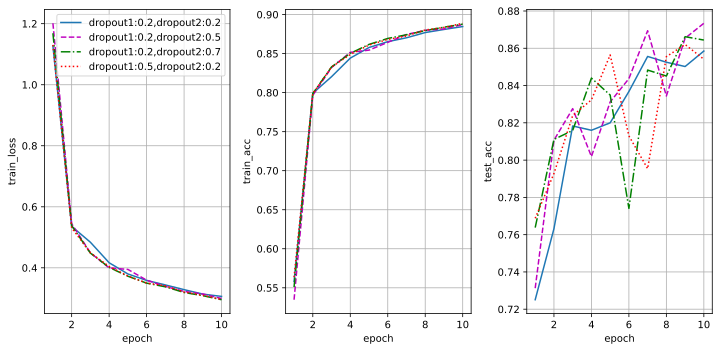

In [34]:
d2l.plt.figure(figsize=(12, 5.5))
d2l.plt.subplot(131)
d2l.plot(list(range(1,11)),np.vstack([train_losslist[i,:,:] for i in range(3)]),'epoch', 'train_loss',
                     legend=[f'dropout1:{dropout1},dropout2:{dropout2}' for dropout1 in dropout1_list for dropout2 in dropout2_list])
d2l.plt.subplot(132)
d2l.plot(list(range(1,11)),np.vstack([train_acclist[i,:,:] for i in range(3)]),'epoch', 'train_acc')
                     #legend=[f'dropout1:{dropout1},dropout2:{dropout2}' for dropout1 in dropout1list for dropout2 in dropout1list],figsize=(10, 8))
d2l.plt.subplot(133)
d2l.plot(list(range(1,11)),np.vstack([test_acclist[i,:,:] for i in range(3)]),'epoch', 'test_acc')
                     #legend=[f'dropout1:{dropout1},dropout2:{dropout2}' for dropout1 in dropout1list for dropout2 in dropout1list],figsize=(10, 8))
d2l.plt.subplots_adjust(wspace =0.3, hspace =0)
d2l.plt.show()
